In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob, math

In [4]:
left=[0,600] #left bottom most point of trapezium
right=[1280,600] #right bottom most point of trapezium
apex_left=[300,450] # left top most point of trapezium
apex_right=[980,450] # right top most point of trapezium
    

src=np.float32([left,apex_left,apex_right,right]) # Source Points for Image Warp
dst= np.float32([[200 ,720], [200  ,0], [980 ,0], [980 ,720]]) # Destination Points for Image Warp

def ROI(originalImage):
    return cv2.polylines(originalImage,np.int32(np.array([[left,apex_left,apex_right,right]])),True,(0,0,255),10)

def WarpPerspective(image):
    y=image.shape[0]
    x=image.shape[1]
    M = cv2.getPerspectiveTransform(src, dst)
    return cv2.warpPerspective(image, M, (x,y), flags=cv2.INTER_LINEAR)

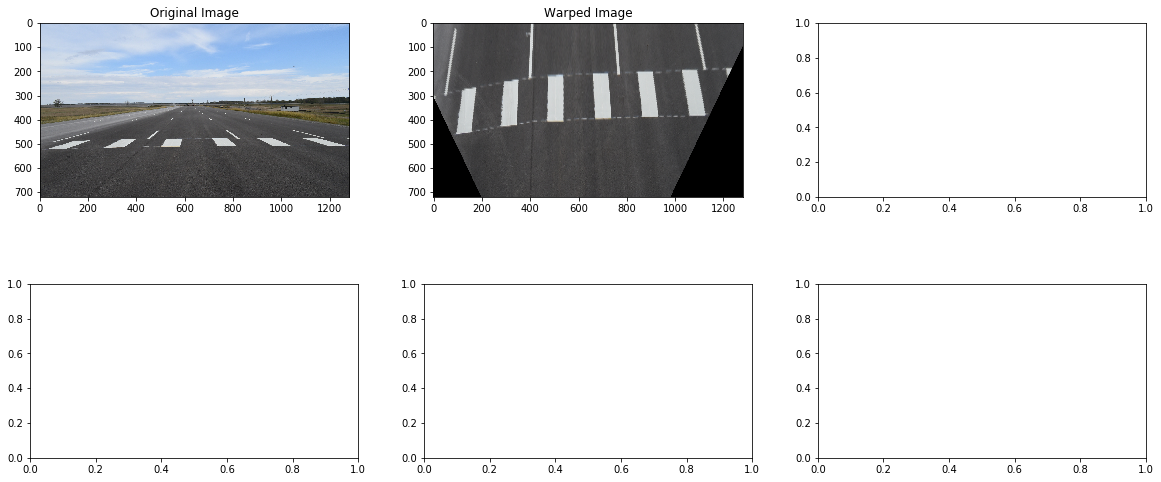

In [39]:
f, axes= plt.subplots(2,3,figsize=(20,8))
f.subplots_adjust(hspace=0.5)

warpedImages=[]
for index, image in enumerate(test_imgs):
    temp_img = cv2.imread(image)
    img = cv2.resize(img, (1280, 720))
    originalImage= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    untouchedImage= originalImage.copy()
    axes[index,0].imshow(originalImage)
    axes[index,0].set_title("Original Image")
    y=untouchedImage.shape[0]
    x=untouchedImage.shape[1]
    warped = WarpPerspective(untouchedImage)
    warpedImages.append(warped)
    axes[index,1].imshow(warped)
    axes[index,1].set_title("Warped Image")

In [ ]:
def get_img(img_path="./DSC_0155.JPG"):
    temp_img = cv2.imread(img_path)
    img = cv2.resize(temp_img, (1280, 720))
    originalImage= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    untouchedImage= originalImage.copy()
    warped = WarpPerspective(untouchedImage)
    return warped

warped = get_img()
# Edge detection
dst = cv2.Canny(warped, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

#  Standard Hough Line Transform
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

cv2.imshow("Source", src)
cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

cv2.waitKey()